<a href="https://colab.research.google.com/github/arisalcedo/Coderhouse/blob/main/Desafio_EvaluacionML_Salcedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis de precios de materias primas**


*ABSTRACT*

Las cadenas agroalimentarias generan 1 de cada 10 pesos del produto bruto interno argentino, mas precisamente el 9,92%. En 2021 7 de cada 10 dólares de las exportaciones totales del pais fueron producidas por el sector agrícola. A pesar de esto, el sector primario es indefectiblemente un tomador de precios, esto significa que las cotizaciones de sus productos se generan en otros mercados del mundo sobre los cuales no pueden influir, como lo es el mercado de Chicago. Particularmente el pequeño productor argentino debido a sus limitaciones financieras y poco desarrollo tecnológico solo puede especular y ver que hacen sus vecinos, para repicarlo en su campo y esperar que sea la decision correcta. 
  
El objetivo de este análisis es determinar si a través del estudio de ciertas variables estrategicas podemos establecer un precio esperado para los cereales de mayor relevancia para la Argentina, de este modo el productor argentino podría estar mas y mejor preparado para los posibles movimientos del mercado. 

Sabemos que la crisis en Estados Unidos, de la mano de la historica inflación que tambien afecta a Europa, seguramente tenga repercusiones en los precios internacionales de los commodities, ya que ante la devaluación del Euro, sus compras en Dólares resultarán mas caras, por lo que seguramente se transmita en una supresión del precio de la harina y el aceite de soja, por ejemplo, productos que se exportan desde Argentina casi exclusivamente a la union europea. 

1. influye el precio del barril de crudo en el precio del maíz? Ambos precios tienen una relacion positiva?
2. En que proporción la variacion del precio del crudo influye y se traslada al precio de la gasolina?
3. El precio de la soja guarda una relacion con el precio del maíz
4. El precio del trigo en los ultimos cinco años solo ha ido en aumento. 
5. El precio del Oro tiene relación directa con el precio del barril de crudo. 
6. El precio del Oro tiene relacion positiva con el precio del maíz. 






El analisis de estos precios, puede ayudar en las decisiones futuras no solo en industrias de actividad primaria sino tambien en manufactureras, quienes, por ejemplo, a partir del precio estimado de petroleo a futuro pueden definir o no producir un cierto tipo de bien o servicio, decidir sobre las formas de distribución de productos o inclusive sobre su dotacion de personal. En un pais productor como es la Argentina, sería muy conveniente predecir el precio futuro de ciertos cultivos para que gran parte de la actividad agrícola pudiese definir un plan de siembra basados en información mas certera, apoyando a la actividad sabiendo cuando es mejor momento para fijarle precio a su cosecha, cuantas toneladas les haría falta para saldar deudas y cuantas mas quedarían de ganancia, disminuyendo así la incetidumbre que se genera al no saber el escenario de los mercados en un futuro.

**Variables de mayor relevancia**
- WTI CRUDE: Precio del barril de petroleo crudo en Euros/Barril
- GOLD: Precio del oro en Euros/Onza
- SOYBEANS: Precio de soja en Euros/Bushel
- CORN: Precio del maiz en Euros/Bushel
- WHEAT: Precio del trigo en Euros/Bushel
- GASOLINE: Precio del litro de gasolina en Euros/Lt

**Contexto mundial**

  La invasión rusa y las sanciones aplicadas por las naciones occidentales a Moscú iniciaron históricos aumentos de los precios mundiales de alimentos y combustibles e impulsaron a las empresas a buscar fuentes alternativas de suministro.

  Los paises desarrollados han realizado una suba de tasas profundizando la tendencia alcista del dólar a nivel global, lo que traería, entre otras consecuencias, una baja en los precios de los commodities, con el objetivo de desacelerar la escalada de precios que se produjo como consecuencia de la política expansiva que sostuvieron durante la pandemia y a la distorsión de precios que provocó la guerra en Ucrania, pero está impactando negativamente en la economía y comienza a encender alarmas sobre un complejo panorama para la actividad económica en 2023.

  Latinoamerica podría ser parte de la solucion para abastecer esa falta de oferta pero para poder sacar provecho de este ámbito, se deberían aplicar politicas que impulsaran reformas para aumentar la productividad y la competencia y aumentar el nivel de desarrollo porque se exportan productos sin valor agregado, como petróleo, minerales o granos.
Otro gran enemigo de America Latina es la inflación, que desdibuja las ganancias desde el punto de vista comercial. 

  En cuanto a Argentina, y estando en un contexto totalemnte globalizado, no va a estar exenta de la crisis o recesion mundial, por lo que puede esperar una caida en los precios de los commodities, como asi tambien en las cantidades, sumado a que en el ambito local para la campaña 2022-2023 se espera la continuacion de la sequía que ya viene afectando desde por lo menos dos campañas hacia atras. Juega un papel importante el desincentivo que implica el mercado cambiario a pesar de que se continuen generando trajes a medida para complejos exportadores específicos, como es el "dólar soja". 

#Extracción y preprocesamiento de los datos

### Importamos librerías necesarias

In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import json

###Generamos una conexión con la API de Kaggle, nuestra fuente de datos seleccionada e importamos el dataset

Dataset obtenido de:

https://www.kaggle.com/datasets/debashish311601/commodity-prices

In [2]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"arisalcedoferraggine","key":"9ff4f4dc0be5e897c4f9fa8fe06d90e4"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle datasets download -d debashish311601/commodity-prices -p /content/kaggle/
!unzip /content/kaggle/commodity-prices.zip

100% 355k/355k [00:00<00:00, 730kB/s]
100% 355k/355k [00:00<00:00, 729kB/s]
Archive:  /content/kaggle/commodity-prices.zip
  inflating: commodity_futures.csv   
  inflating: list_of_categories.csv  


In [4]:
df_commodity = pd.read_csv('/content/commodity_futures.csv', sep=',', parse_dates=['Date'])
df_commodity


,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,2022-11-14,5.933,1776.9,85.87,93.14,1441.75,657.25,3.8335,22.113,991.75,...,3154.00,354.40,28767.0,818.50,19.83,252.85,166.20,84.875,956.25,85.28
5904,2022-11-15,6.034,1776.8,86.92,93.86,1457.25,666.75,3.8200,21.518,990.25,...,3125.00,364.13,30176.0,828.25,20.29,251.61,156.75,85.325,963.00,88.74
5905,2022-11-16,6.200,1775.8,85.59,92.86,1429.25,665.25,3.7735,21.524,991.75,...,3061.50,361.36,27441.0,817.50,20.27,250.80,155.45,85.575,955.50,88.44
5906,2022-11-17,6.369,1763.0,81.64,89.78,1417.00,667.50,3.6880,20.975,956.00,...,2988.00,352.48,24934.0,806.75,19.73,245.47,152.70,84.975,938.00,87.04


In [5]:
print(df_commodity['Date'].dtype)

datetime64[ns]


### **Agregamos variables de fechas para facilitar el agrupamiento**

In [6]:
df_commodity['Month']=pd.DatetimeIndex(df_commodity['Date']).month
df_commodity['Year']=pd.DatetimeIndex(df_commodity['Date']).year
df_commodity['Periodo']=df_commodity['Date'].dt.strftime('20%y %m')

df_commodity=df_commodity.set_index(['Periodo'])
df_commodity


,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,Month,Year
Periodo,,,,,,,,,,,,,,,,,,,,,
2000 01,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07,1,2000
2000 01,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73,1,2000
2000 01,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56,1,2000
2000 01,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08,1,2000
2000 01,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022 11,2022-11-14,5.933,1776.9,85.87,93.14,1441.75,657.25,3.8335,22.113,991.75,...,28767.0,818.50,19.83,252.85,166.20,84.875,956.25,85.28,11,2022
2022 11,2022-11-15,6.034,1776.8,86.92,93.86,1457.25,666.75,3.8200,21.518,990.25,...,30176.0,828.25,20.29,251.61,156.75,85.325,963.00,88.74,11,2022
2022 11,2022-11-16,6.200,1775.8,85.59,92.86,1429.25,665.25,3.7735,21.524,991.75,...,27441.0,817.50,20.27,250.80,155.45,85.575,955.50,88.44,11,2022


In [7]:
#Seleccion de estilo para los graficos
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Analisis Exploratorio 🔎

Un breve recorrido de como sacamos datos de nuestros datos, porque antes de realizar cualquier analisis de las materias primas...tenemos que conocer la nuestra! 

## Cuantos outliers tiene cada variable?

Primer parada del recorrido: vemos todas las variables pero escaladas para que la diferencia de unidades no afecte la visual. 

Los puntos que se encuentran mas alla de los minimos y máximos son outliers

In [8]:
lista_commodity=list(df_commodity.columns)
remove=['Date', 'Month', 'Year']
lista_commodity=set(lista_commodity) - set(remove)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax=scaler.fit_transform(df_commodity[lista_commodity])
df_minmax=pd.DataFrame(df_minmax, columns=lista_commodity, index=df_commodity.index)
df_minmax


df_boxplot=pd.melt(df_minmax, value_vars=lista_commodity, var_name='Commodity', value_name='Precio Normalizado', ignore_index=True)
df_boxplot


<ipython-input-8-d85793f2f912>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_minmax=scaler.fit_transform(df_commodity[lista_commodity])


,Commodity,Precio Normalizado
0,SOYBEANS,0.028455
1,SOYBEANS,0.034183
2,SOYBEANS,0.037879
3,SOYBEANS,0.036955
4,SOYBEANS,0.039542
...,...,...
135879,LOW SULPHUR GAS OIL,0.613719
135880,LOW SULPHUR GAS OIL,0.612627
135881,LOW SULPHUR GAS OIL,0.613719
135882,LOW SULPHUR GAS OIL,0.587700


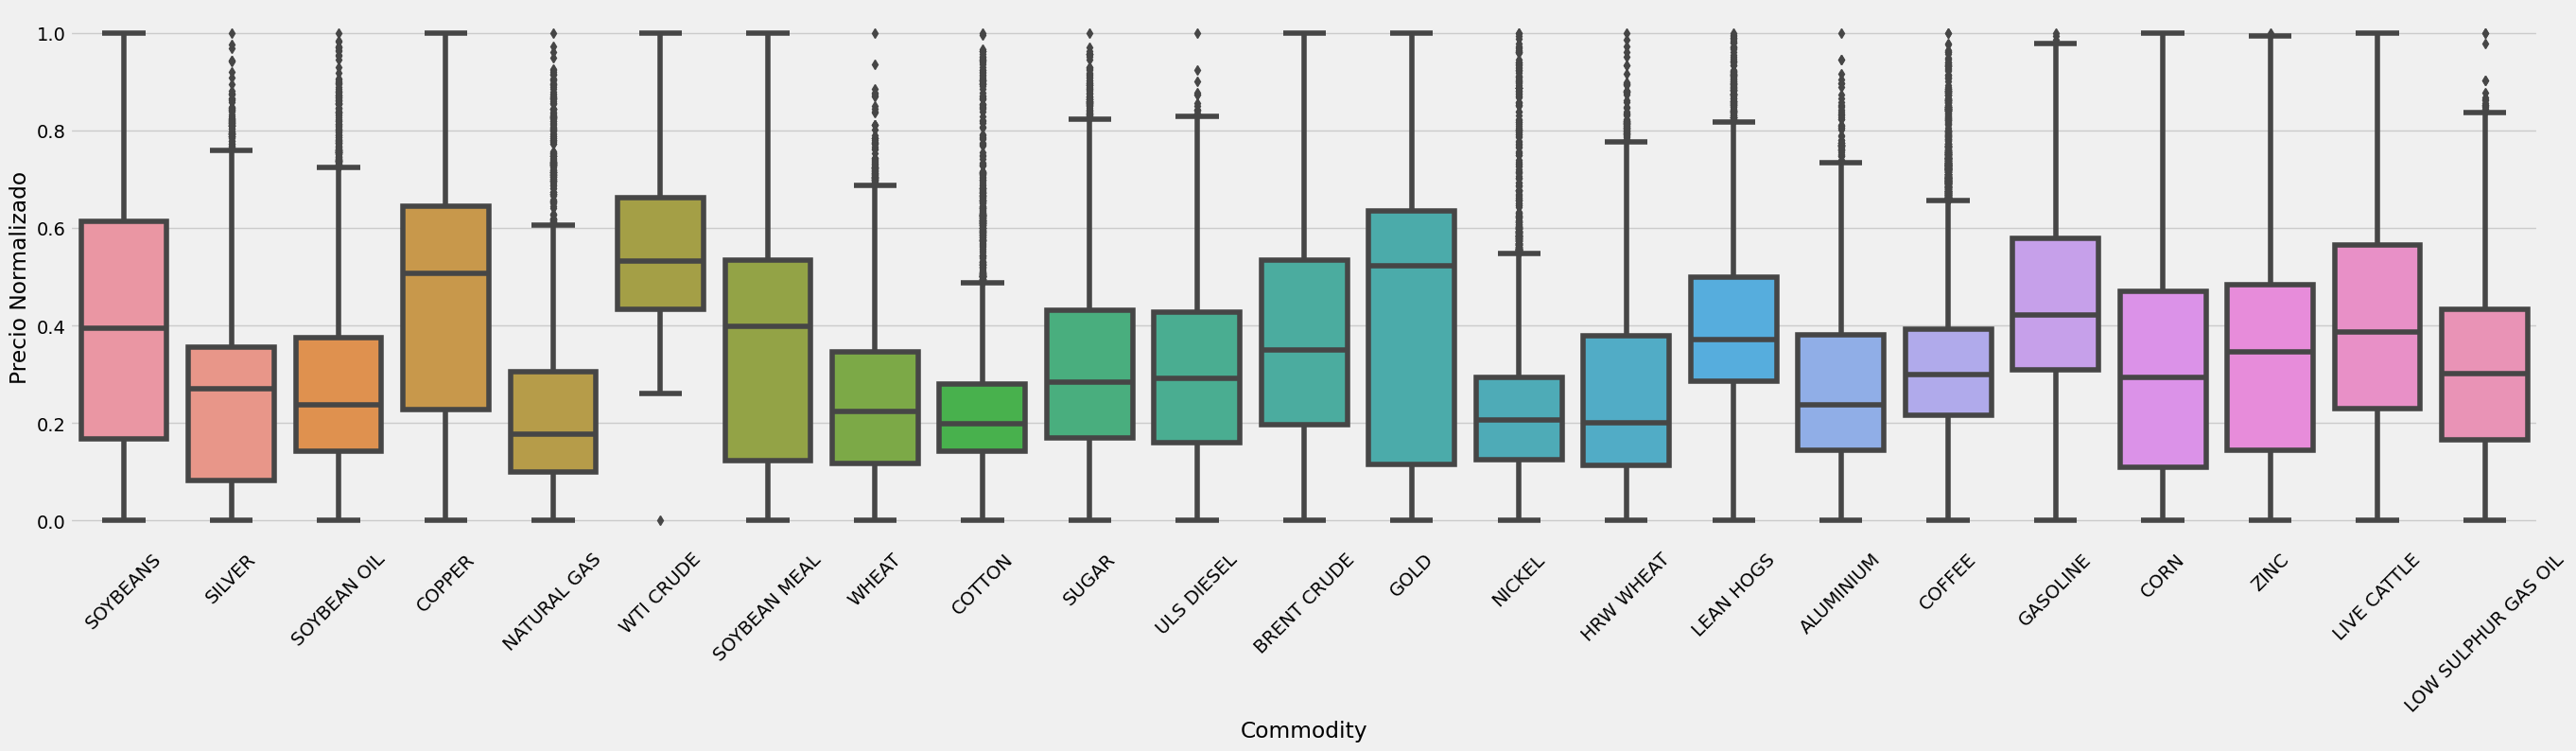

In [9]:
plt.subplots(figsize=(30,7))
sns.boxplot(data=df_boxplot, x='Commodity', y='Precio Normalizado')
plt.xticks(rotation=45)
plt.show()

## Cuan relacionados estan los precios de los commodities entre si?

A medida que los colores se oscurecen, es menor la relacion entre las variables, pero precaución...las variables que estan demasiado relacionadas no nos servirán para alimentar nuestro modelo 👀

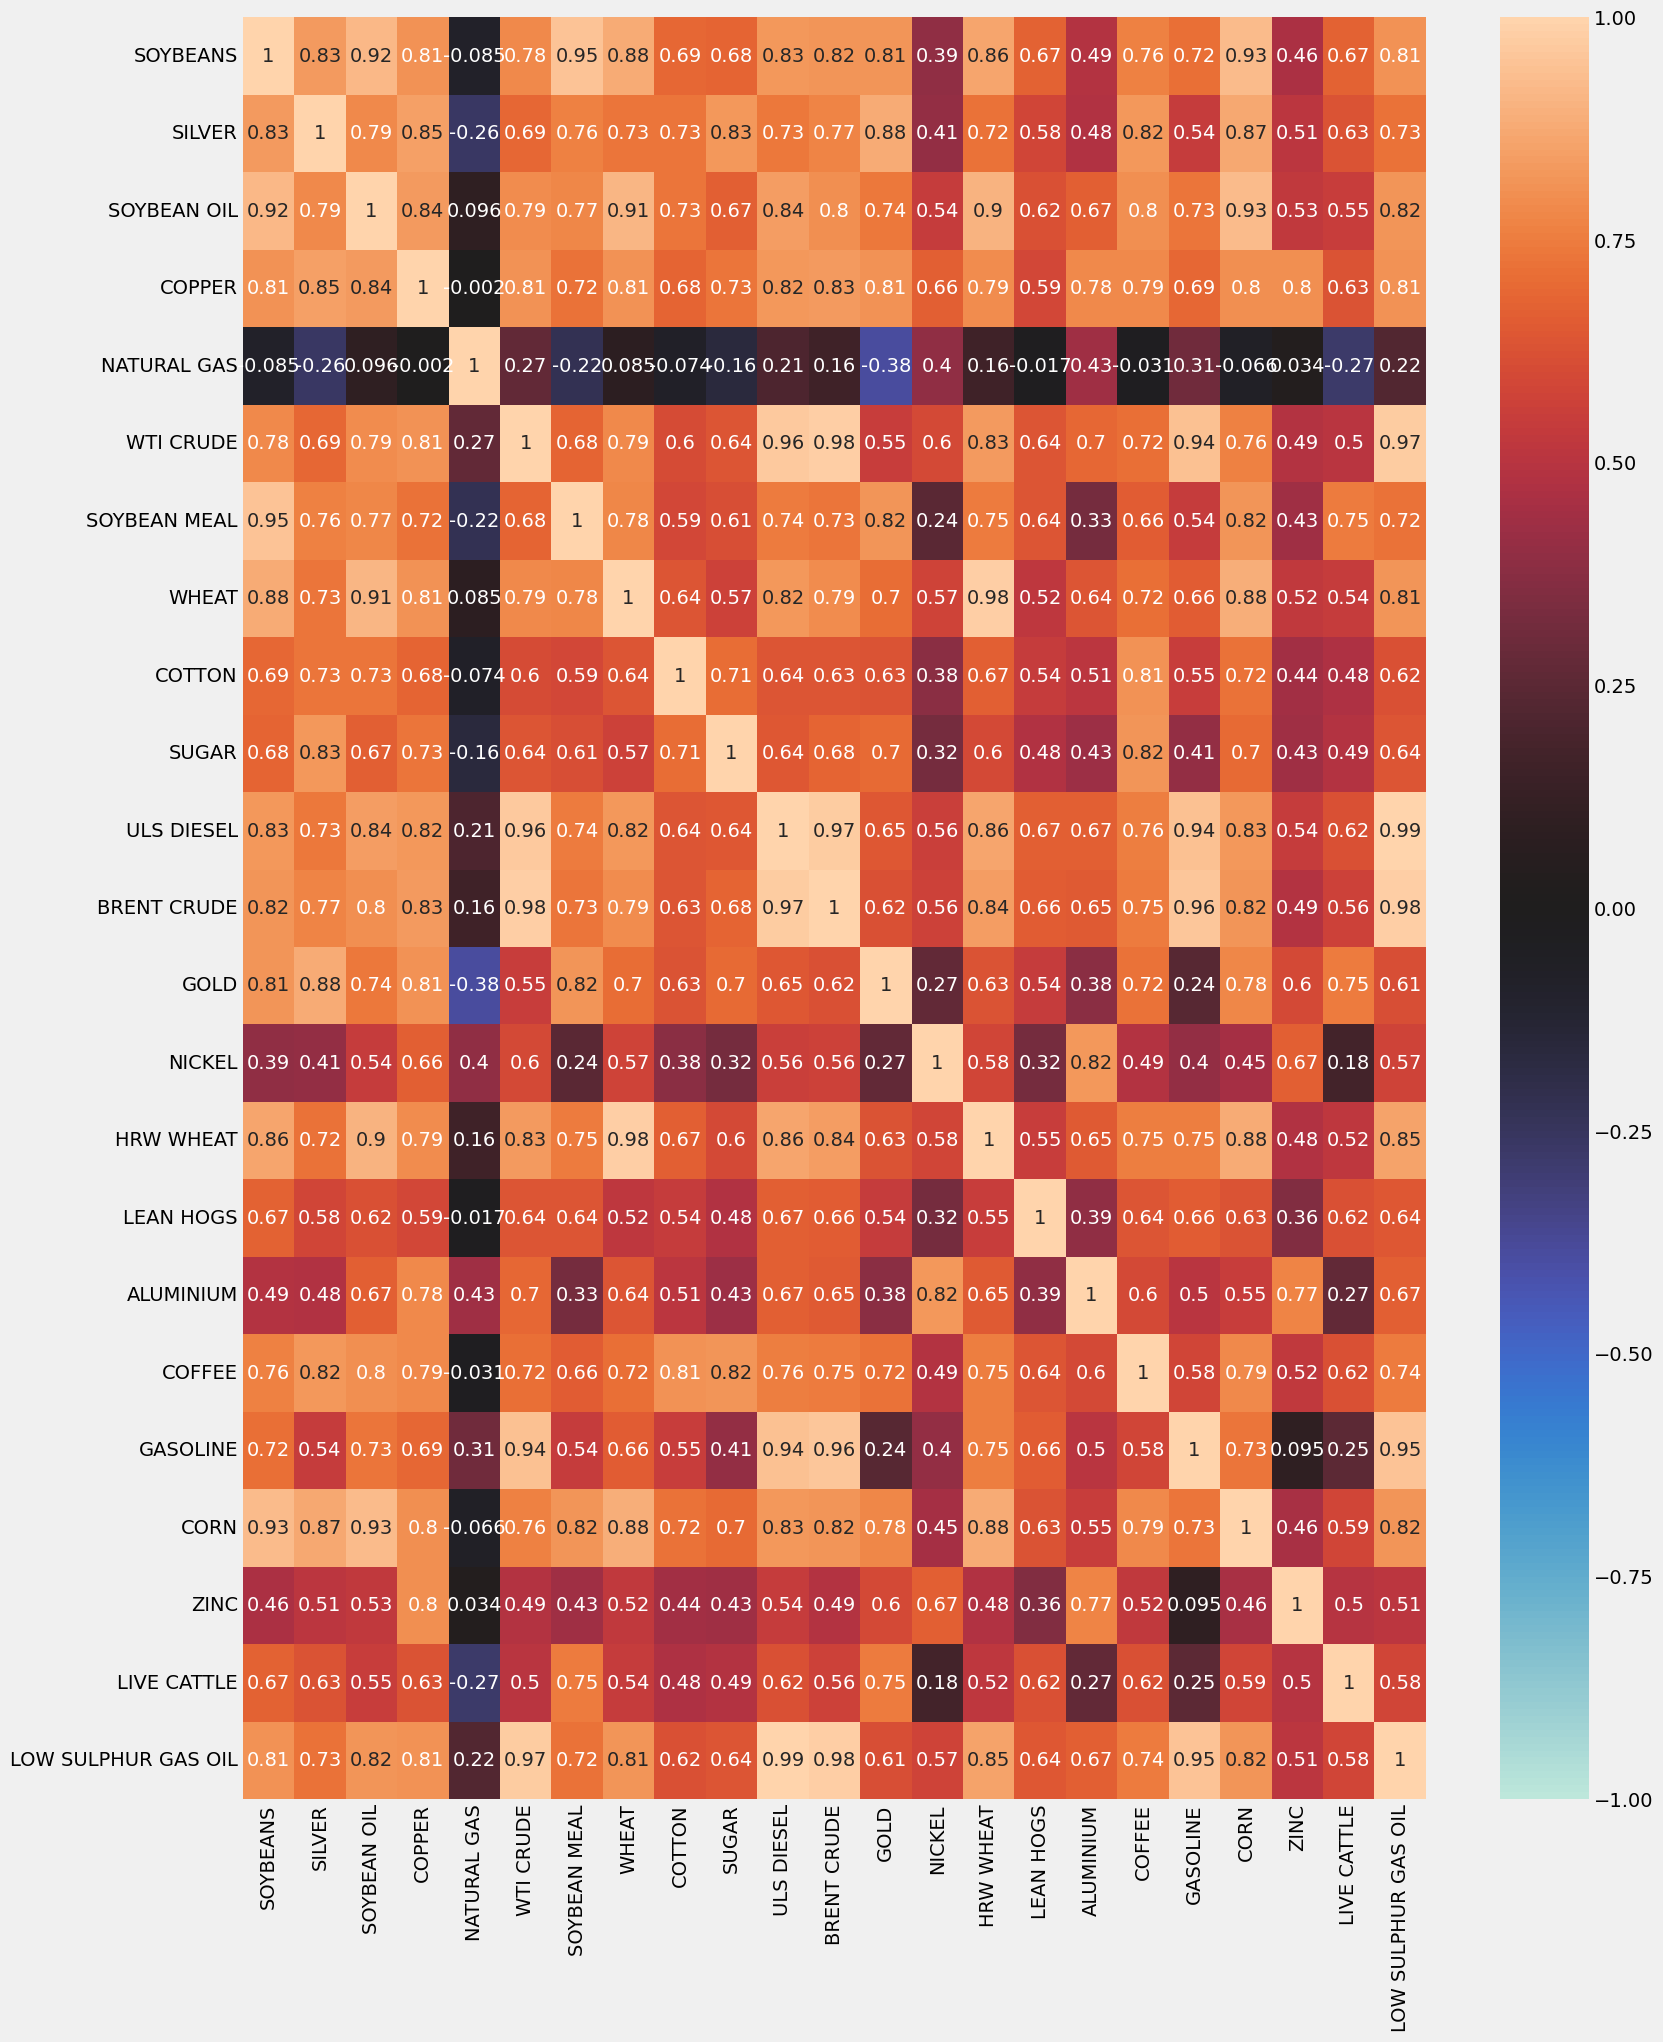

In [10]:
corr_df2=df_minmax.corr(method='pearson')
plt.figure(figsize=(17, 22))
sns.heatmap(corr_df2
            ,annot=True,
            vmin = -1,
            vmax = 1,
            center = 0,
            )
plt.show()

## Cuantos datos nulos tiene cada variable?

Una cualidad importante de los datasets es que esten completos, se parecen a las medias 🧦 porque cuando tienen agujeritos son incomodas

In [11]:
#Cantidad de valores nulos
df_commodity.isnull().sum()

Date                      0
NATURAL GAS               1
GOLD                      1
WTI CRUDE                 1
BRENT CRUDE               1
SOYBEANS                  0
CORN                      0
COPPER                    1
SILVER                    1
LOW SULPHUR GAS OIL       1
LIVE CATTLE               0
SOYBEAN OIL               0
ALUMINIUM                 1
SOYBEAN MEAL              0
ZINC                      0
ULS DIESEL                1
NICKEL                    0
WHEAT                     0
SUGAR                     0
GASOLINE               1483
COFFEE                    0
LEAN HOGS                 0
HRW WHEAT                 0
COTTON                    0
Month                     0
Year                      0
dtype: int64

### En que periodos se encuentran los datos nulos de la serie Gasoline?

In [12]:
# Para graficar en que periodo se encuentran los nulos de la serie GASOLINE

gasoline_null = pd.Series(df_commodity['GASOLINE'].isnull().groupby(level=['Periodo']).sum())
gasoline_null


Periodo
2000 01    21
2000 02    21
2000 03    23
2000 04    20
2000 05    23
           ..
2022 07     0
2022 08     0
2022 09     0
2022 10     0
2022 11     0
Name: GASOLINE, Length: 275, dtype: int64

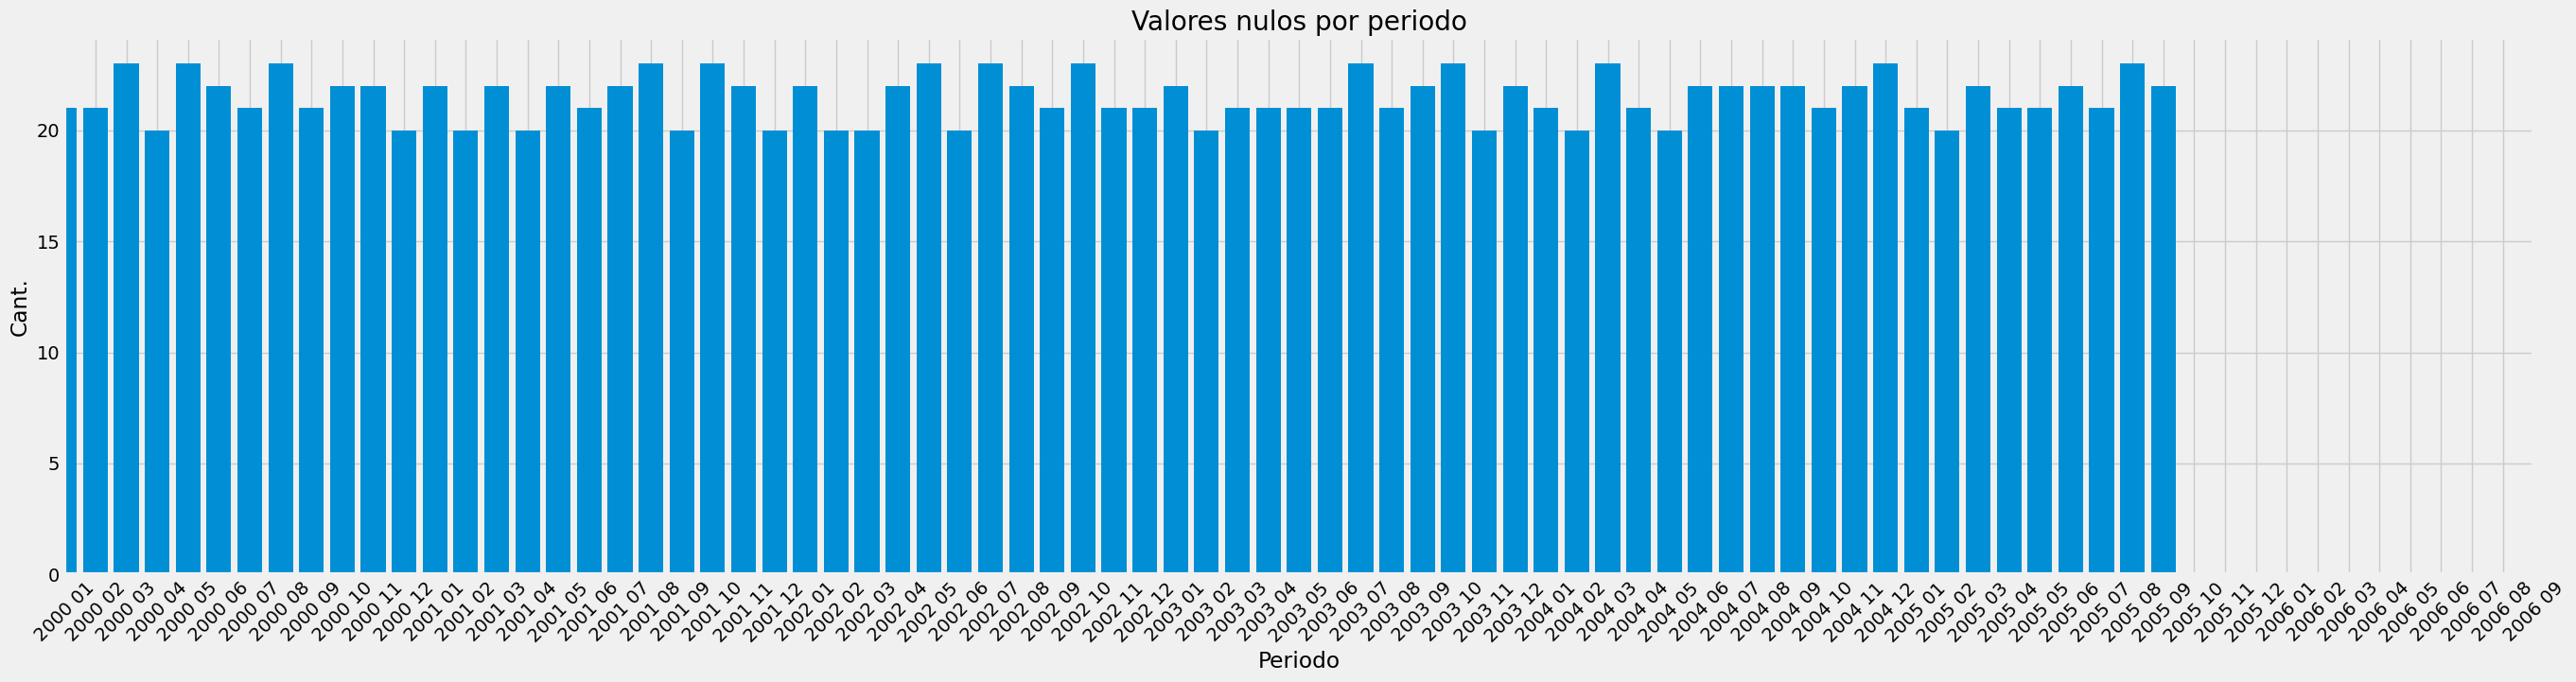

In [13]:
fig, ax = plt.subplots(figsize=(30,7))
ax.bar(gasoline_null.index, gasoline_null.values)
plt.xticks(rotation=45)
ax.set_title('Valores nulos por periodo')
ax.set_ylabel('Cant.')
ax.set_xlabel('Periodo')
ax.set_xlim([0,80])
plt.show()


Mediante el grafico anterior se observa que hay muchos datos faltantes para el precio de la gasolina durante los primeros 5 años. Se encuentra colocado un limite en el eje x para una mejor apreciacion.

## **Analisis de la variable barril de crudo**

In [14]:
df_crudo =df_commodity.loc[:,['Year','WTI CRUDE']]
df_crudo

,Year,WTI CRUDE
Periodo,,
2000 01,2000,NaN
2000 01,2000,25.55
2000 01,2000,24.91
2000 01,2000,24.78
2000 01,2000,24.22
...,...,...
2022 11,2022,85.87
2022 11,2022,86.92
2022 11,2022,85.59


Mediante el grafico de caja y bigotes podemos visualizar facilmente la presencia de outliers, valores que alteraran el calculo del promedio. Sabiendo si estos valores atipicos son máximos o mínimos podemos comprender de que forma se vera afectado este calculo, y conociendo el año en el cual se presentan nos permitiria recabar información adicional para determinar si son errores. En el caso particular del precio de los commodities, hay sucesos de indole mundial que hacen variar los precios de forma desmedida como guerras, desastres naturales, lobbies, etc.

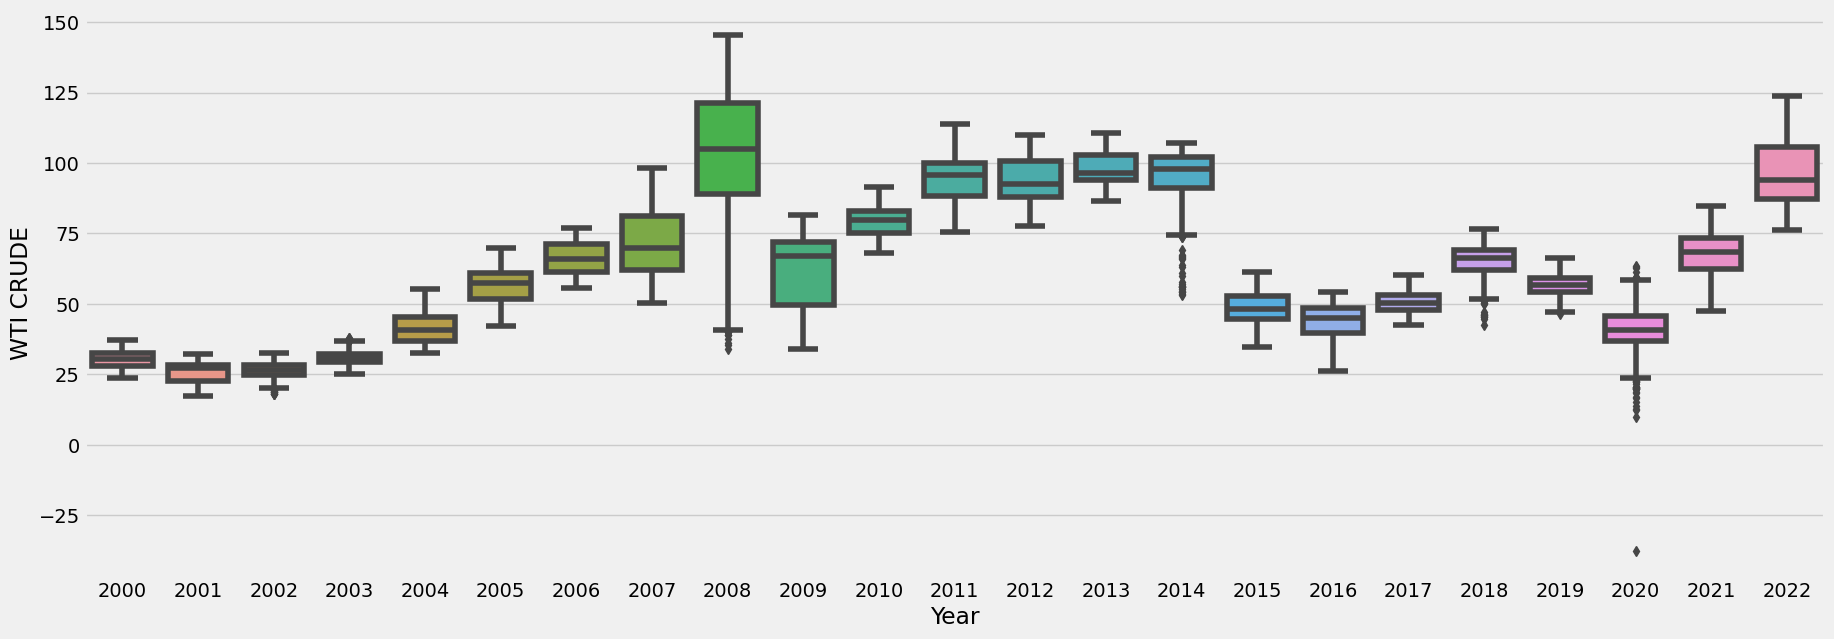

In [15]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.boxplot(data=df_crudo, x='Year', y='WTI CRUDE')
plt.show()

**Evolucion del precio promedio a lo largo de los años**




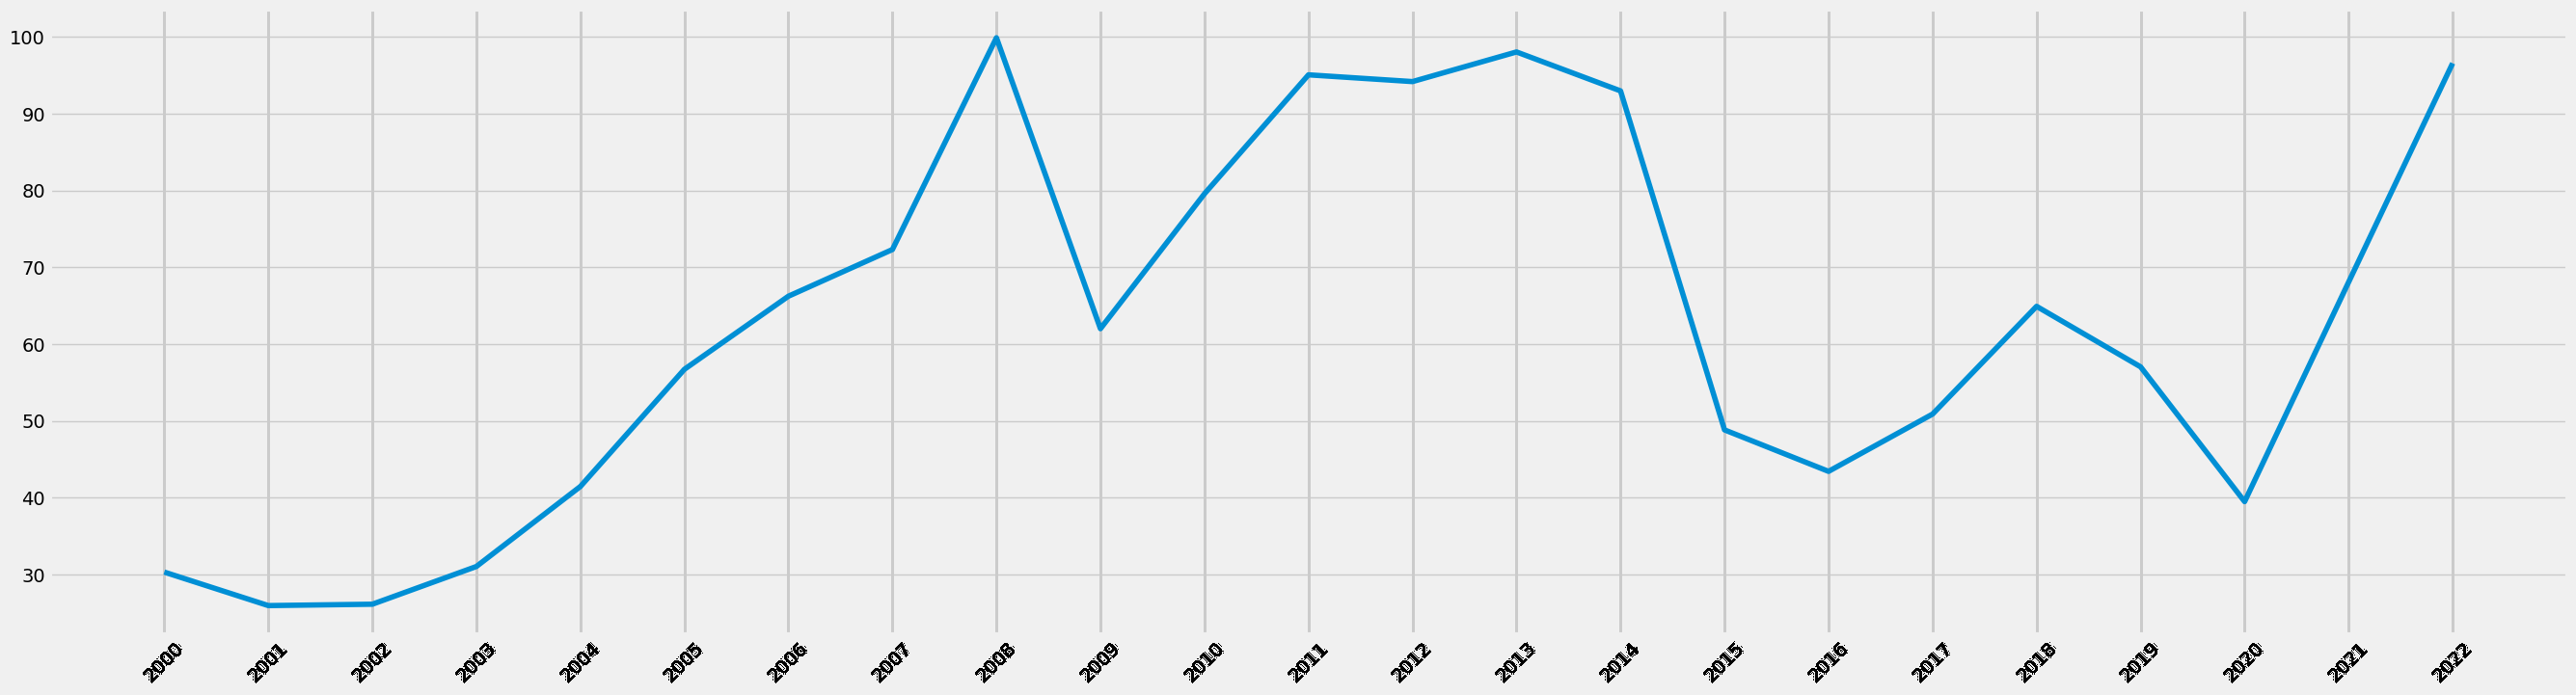

In [16]:
fig, ax =plt.subplots(figsize=(30,8))
ax.plot(df_crudo.groupby('Year').mean().round(2))
plt.xticks(ticks=df_crudo['Year'], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()


## **Comparacion entre el precio del barril de crudo y la gasolina**

Dos variables con una correlacion alta y positiva, logicamente entendible siendo que una deriva del otro. 

In [17]:
df_gasolina =df_commodity.loc[:,['Year', 'GASOLINE']]
df_gasolina.rename(columns={'GASOLINE':'precio'}, inplace=True)
df_gasolina.insert(2,'Commodity', 'Gasolina')
df_gasolina.dropna(inplace=True)


df_crudo.rename(columns={'WTI CRUDE': 'precio'}, inplace=True)
df_crudo.insert(2,'Commodity', 'Crudo')
df_crudo

,Year,precio,Commodity
Periodo,,,
2000 01,2000,NaN,Crudo
2000 01,2000,25.55,Crudo
2000 01,2000,24.91,Crudo
2000 01,2000,24.78,Crudo
2000 01,2000,24.22,Crudo
...,...,...,...
2022 11,2022,85.87,Crudo
2022 11,2022,86.92,Crudo
2022 11,2022,85.59,Crudo


In [18]:
crudo_vs_gasolina =pd.concat([df_gasolina, df_crudo], axis=0).sort_index()
crudo_vs_gasolina

,Year,precio,Commodity
Periodo,,,
2000 01,2000,NaN,Crudo
2000 01,2000,27.64,Crudo
2000 01,2000,27.22,Crudo
2000 01,2000,27.32,Crudo
2000 01,2000,27.84,Crudo
...,...,...,...
2022 11,2022,251.61,Gasolina
2022 11,2022,250.80,Gasolina
2022 11,2022,245.47,Gasolina


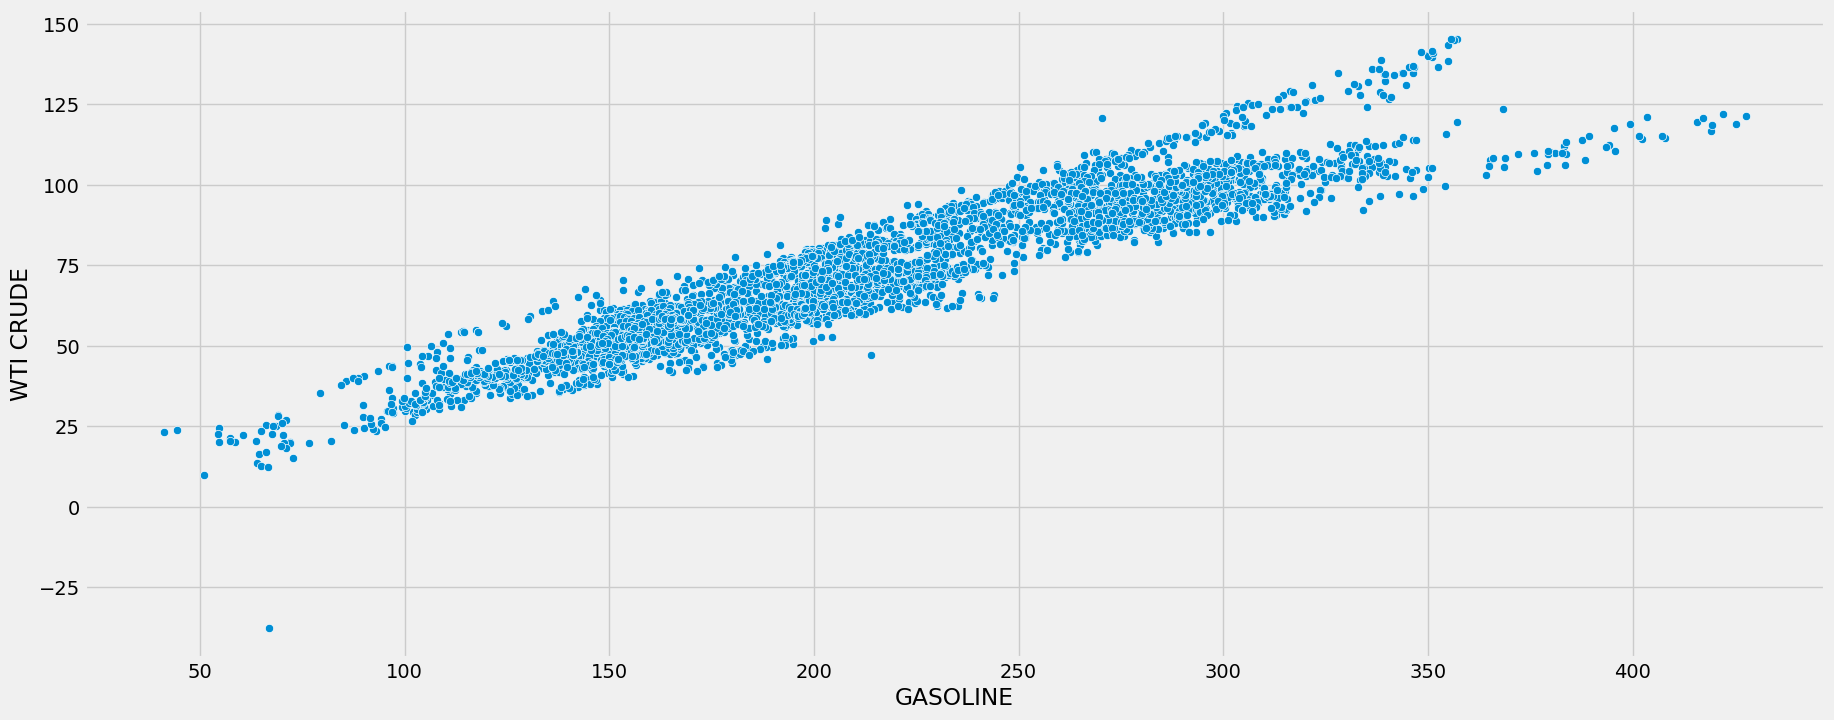

In [19]:
fig, ax =plt.subplots(figsize=(20,8))
sns.scatterplot(data=df_commodity, x=df_commodity['GASOLINE'], y=df_commodity['WTI CRUDE'])
plt.show()

Calculamos el coeficiente de correlacion

In [20]:
df_commodity['GASOLINE'].corr(df_commodity['WTI CRUDE'])

#utilizamos pandas .corr por sobre numpy .corrcoef ya que el primero tiene un mejor tratamiento respecto de los valores nulos. 

0.9425446676836517

## **Analisis de la variable Maiz**

In [21]:
df_maiz =df_commodity.loc[:,'CORN']
df_maiz

Periodo
2000 01    200.75
2000 01    203.00
2000 01    203.00
2000 01    203.75
2000 01    207.00
            ...  
2022 11    657.25
2022 11    666.75
2022 11    665.25
2022 11    667.50
2022 11    670.75
Name: CORN, Length: 5908, dtype: float64

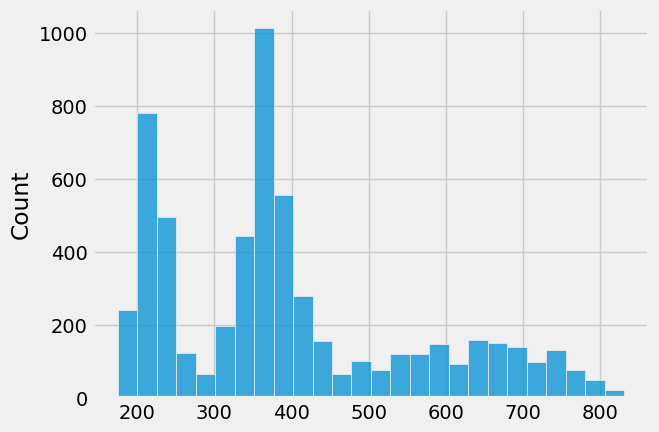

In [22]:
sns.histplot(data=df_maiz,x=df_maiz.values)
plt.show()

## **Analisis de las variables Gas y Petroleo**

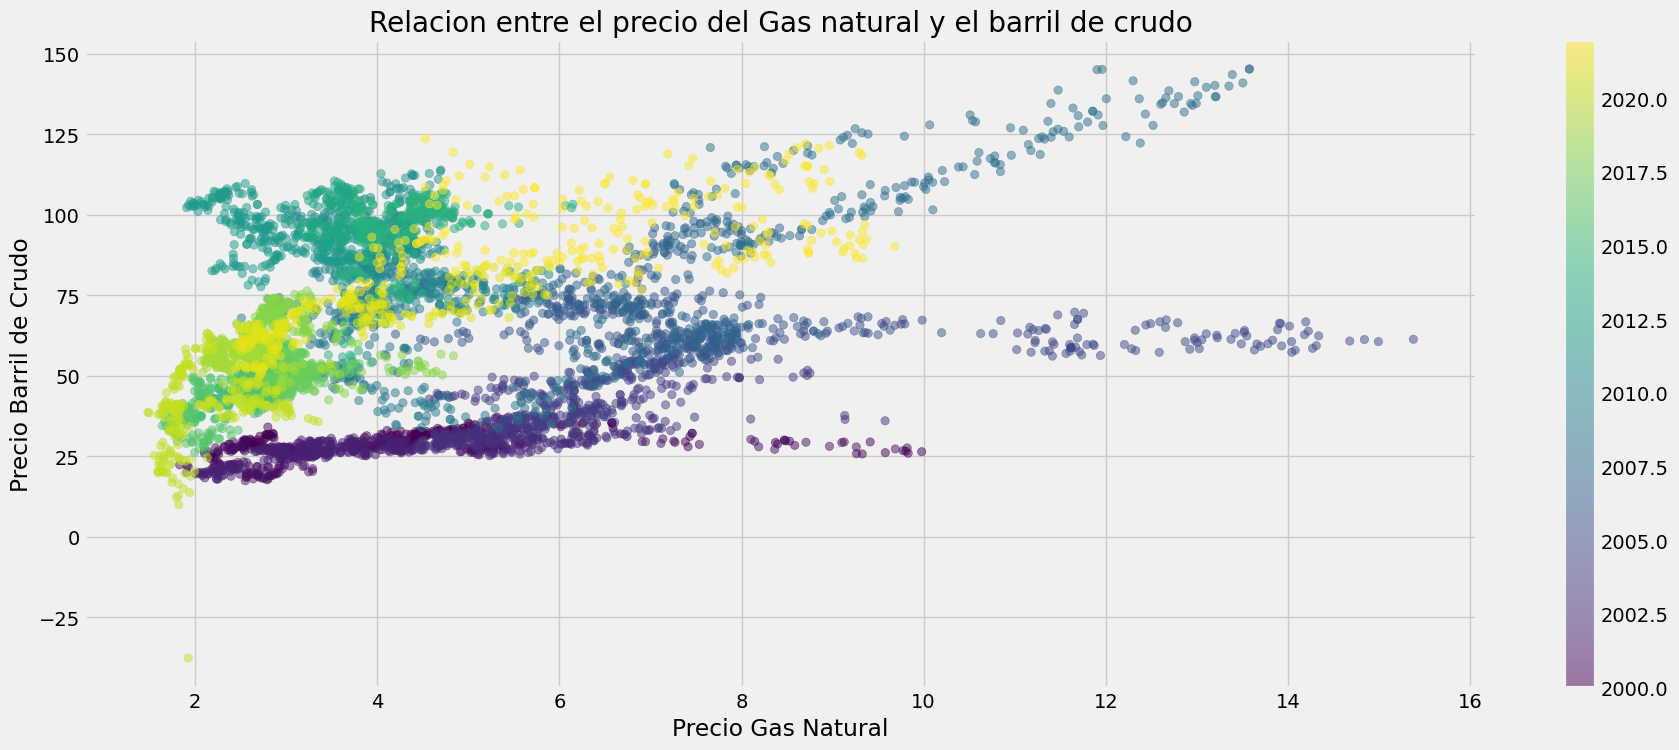

In [23]:
fig, ax = plt.subplots(figsize=(20,8))  
mapeo_colores = ax.scatter(df_commodity['NATURAL GAS'], df_commodity['WTI CRUDE'], 
                          c=(df_commodity['Year']), alpha=0.5) #asigno colores a los valores del indice (años) con parametro c
fig.colorbar(mapeo_colores) #agrego una barra a la derecha con los colores de los años y las etiquetas respectivas

ax.set_title('Relacion entre el precio del Gas natural y el barril de crudo')
ax.set_xlabel('Precio Gas Natural')
ax.set_ylabel('Precio Barril de Crudo')

plt.show()

Calculamos el coeficiente de correlacion

In [24]:
df_commodity['NATURAL GAS'].corr(df_commodity['WTI CRUDE'])

0.2683974560565364

#Visualizaciones para comprobar hipotesis 📈 📊

## Hipotesis 3, 5 y 6

* El precio de la soja guarda una relacion con el precio 
del maíz
* El precio del Oro tiene relación directa con el precio del barril de crudo. 
* El precio del Oro tiene relacion positiva con el precio del maíz.

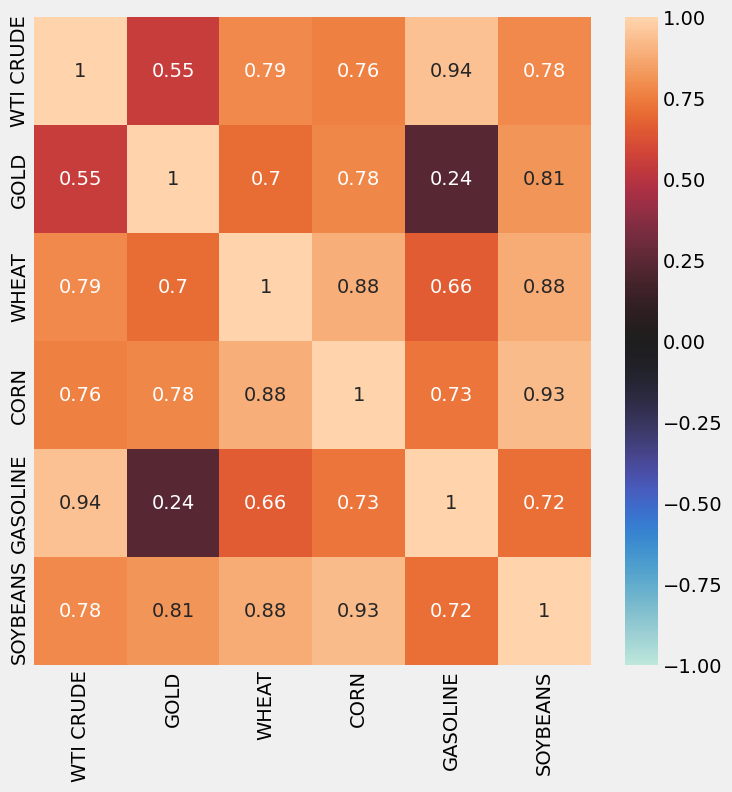

In [25]:
corr_df = df_commodity.loc[:,['WTI CRUDE', 'GOLD','WHEAT', 'CORN', 'GASOLINE', 'SOYBEANS']].corr(method='pearson')
plt.figure(figsize=(8, 8))
sns.heatmap(corr_df
            ,annot=True,
            vmin = -1,
            vmax = 1,
            center = 0,
            )
plt.show()

## Hipotesis 4

* El precio del trigo en los ultimos cinco años solo ha ido en aumento.

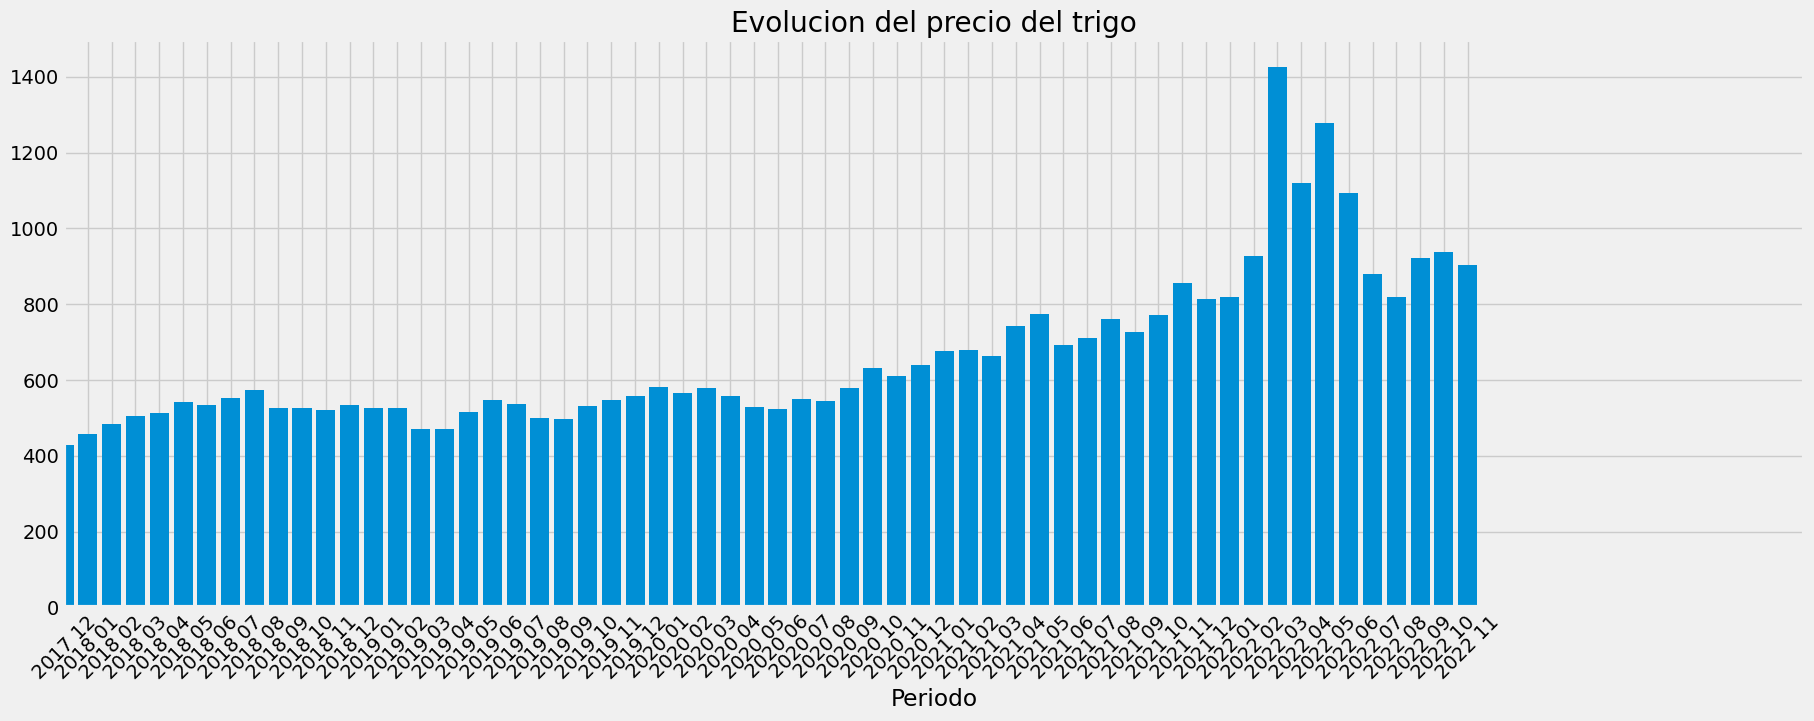

In [26]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(df_commodity.index, df_commodity['WHEAT'].values)
plt.xticks(rotation=45)
ax.set_xlim(left=215)
ax.set_title('Evolucion del precio del trigo')
ax.set_xlabel('Periodo')
plt.show()



# **Datos del clima**   🌞 🌧 🌈



Luego de interiorizarnos en la tematica y consultar a expertos, pudimos mejorar nuestras hipotesis. Los precios de los cereales se ven afectados por las buenas o malas cosechas, y estas a su vez se producen bajo ciertas condiciones climaticas. 

Al surgirnos la pregunta, de si el clima afectaba el precio de los commodities, decidimos buscar datos historicos del clima, puntalmente de ciudades donde la agricultura es la principal actividad. 

Preguntas disparadoras:
- El clima es igual todos los meses del año? Las dos ciudades tienen el mismo comportamiento? 
- Podriamos establecer grupos de meses con caracteristicas climaticas similares para cada ciudad?
- Existen años de lluvias atipicas?
- Las temperaturas guardan relacion con las lluvias?
- Habra relacion entre las lluvias y los precios de los commodities? 


In [27]:
start_date='2000-01-01'
end_date='2022-12-31'
#Tandil, Buenos Aires, Argentina
lat=-37.3280
lon=-59.1181

url=f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,rain_sum&timezone=America%2FSao_Paulo'
respuesta= requests.get(url) #si la respuesta es 200 significa que la conexion fue exitosa

json_data=json.loads(respuesta.text)
df=pd.DataFrame.from_dict(json_data)
df_tandil=pd.DataFrame(np.column_stack(df['daily']), columns=['Date', 'Temp_Max', 'Temp_Min', 'Rain'])
df_tandil['Date']=pd.to_datetime(df_tandil['Date'])
df_tandil['Ciudad']='Tandil'
df_tandil

#la información que necesito esta en el campo 'daily', que contiene listas. Los campos restantes hacen referencia a la ubicacion (latitud y longitud) de donde provienen los datos

,Date,Temp_Max,Temp_Min,Rain,Ciudad
0,2000-01-01,30.8,17.1,0.0,Tandil
1,2000-01-02,31.5,18.6,0.0,Tandil
2,2000-01-03,30.8,14.4,0.0,Tandil
3,2000-01-04,31.2,14.9,0.0,Tandil
4,2000-01-05,31.7,18.3,3.2,Tandil
...,...,...,...,...,...
8396,2022-12-27,29.9,14.8,0.1,Tandil
8397,2022-12-28,23.7,14.8,0.6,Tandil
8398,2022-12-29,27.8,10.9,0.0,Tandil
8399,2022-12-30,34.0,18.2,0.0,Tandil


In [28]:
df_tandil['Temp_Max']=pd.to_numeric(df_tandil['Temp_Max'])
df_tandil['Temp_Min']=pd.to_numeric(df_tandil['Temp_Min'])
df_tandil['Rain']=pd.to_numeric(df_tandil['Rain'])

In [29]:
df_tandil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8401 non-null   datetime64[ns]
 1   Temp_Max  8401 non-null   float64       
 2   Temp_Min  8401 non-null   float64       
 3   Rain      8401 non-null   float64       
 4   Ciudad    8401 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 328.3+ KB


In [30]:
#cordoba
lat=-31.4195
lon=-64.1938

url2=f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,rain_sum&timezone=America%2FSao_Paulo'

respuesta2= requests.get(url2)
json_data2=json.loads(respuesta2.text)
df2=pd.DataFrame.from_dict(json_data2)
df_cordoba=pd.DataFrame(np.column_stack(df2['daily']), columns=['Date', 'Temp_Max', 'Temp_Min', 'Rain'])
df_cordoba['Date']=pd.to_datetime(df_cordoba['Date'])
df_cordoba['Ciudad']='Cordoba'
df_cordoba

,Date,Temp_Max,Temp_Min,Rain,Ciudad
0,2000-01-01,28.7,18.2,0.0,Cordoba
1,2000-01-02,28.8,17.9,0.0,Cordoba
2,2000-01-03,28.5,19.5,0.0,Cordoba
3,2000-01-04,28.4,17.1,2.1,Cordoba
4,2000-01-05,28.8,15.9,0.0,Cordoba
...,...,...,...,...,...
8396,2022-12-27,29.5,15.8,0.6,Cordoba
8397,2022-12-28,28.3,16.9,0.5,Cordoba
8398,2022-12-29,31.2,15.4,0.0,Cordoba
8399,2022-12-30,34.2,19.1,0.0,Cordoba


In [31]:
df_cordoba['Temp_Max']=pd.to_numeric(df_cordoba['Temp_Max'])
df_cordoba['Temp_Min']=pd.to_numeric(df_cordoba['Temp_Min'])
df_cordoba['Rain']=pd.to_numeric(df_cordoba['Rain'])

In [32]:
df_cordoba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8401 non-null   datetime64[ns]
 1   Temp_Max  8401 non-null   float64       
 2   Temp_Min  8401 non-null   float64       
 3   Rain      8401 non-null   float64       
 4   Ciudad    8401 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 328.3+ KB


In [33]:
#uno los df de forma vertical, esta forma me resulta más comoda para analizar este dataset
df_clima_v=pd.concat([df_tandil, df_cordoba], axis=0).reset_index(drop=True)
df_clima_v['Month']=pd.DatetimeIndex(df_clima_v['Date']).month
df_clima_v['Year']=pd.DatetimeIndex(df_clima_v['Date']).year
df_clima_v['Periodo']=df_clima_v['Date'].dt.strftime('20%y %m')
df_clima_v

,Date,Temp_Max,Temp_Min,Rain,Ciudad,Month,Year,Periodo
0,2000-01-01,30.8,17.1,0.0,Tandil,1,2000,2000 01
1,2000-01-02,31.5,18.6,0.0,Tandil,1,2000,2000 01
2,2000-01-03,30.8,14.4,0.0,Tandil,1,2000,2000 01
3,2000-01-04,31.2,14.9,0.0,Tandil,1,2000,2000 01
4,2000-01-05,31.7,18.3,3.2,Tandil,1,2000,2000 01
...,...,...,...,...,...,...,...,...
16797,2022-12-27,29.5,15.8,0.6,Cordoba,12,2022,2022 12
16798,2022-12-28,28.3,16.9,0.5,Cordoba,12,2022,2022 12
16799,2022-12-29,31.2,15.4,0.0,Cordoba,12,2022,2022 12
16800,2022-12-30,34.2,19.1,0.0,Cordoba,12,2022,2022 12


In [34]:
clima_groupby=df_clima_v.groupby(['Periodo','Year','Month','Ciudad']).agg({'Temp_Max':'mean', 'Temp_Min': 'mean', 'Rain':'sum'}).reset_index()
clima_groupby

,Periodo,Year,Month,Ciudad,Temp_Max,Temp_Min,Rain
0,2000 01,2000,1,Cordoba,27.864516,18.470968,96.0
1,2000 01,2000,1,Tandil,28.390323,16.600000,77.2
2,2000 02,2000,2,Cordoba,25.689655,16.610345,113.2
3,2000 02,2000,2,Tandil,25.503448,15.579310,144.9
4,2000 03,2000,3,Cordoba,23.287097,15.135484,86.5
...,...,...,...,...,...,...,...
547,2022 10,2022,10,Tandil,19.425806,7.603226,62.6
548,2022 11,2022,11,Cordoba,29.986667,16.150000,18.8
549,2022 11,2022,11,Tandil,24.763333,12.636667,89.7
550,2022 12,2022,12,Cordoba,31.222581,18.735484,46.6


<ipython-input-35-419629d39f22>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = clima_groupby, x='Month', y='Rain', ax=ax2, hue='Ciudad', ci=None)


<Axes: xlabel='Month', ylabel='Rain'>

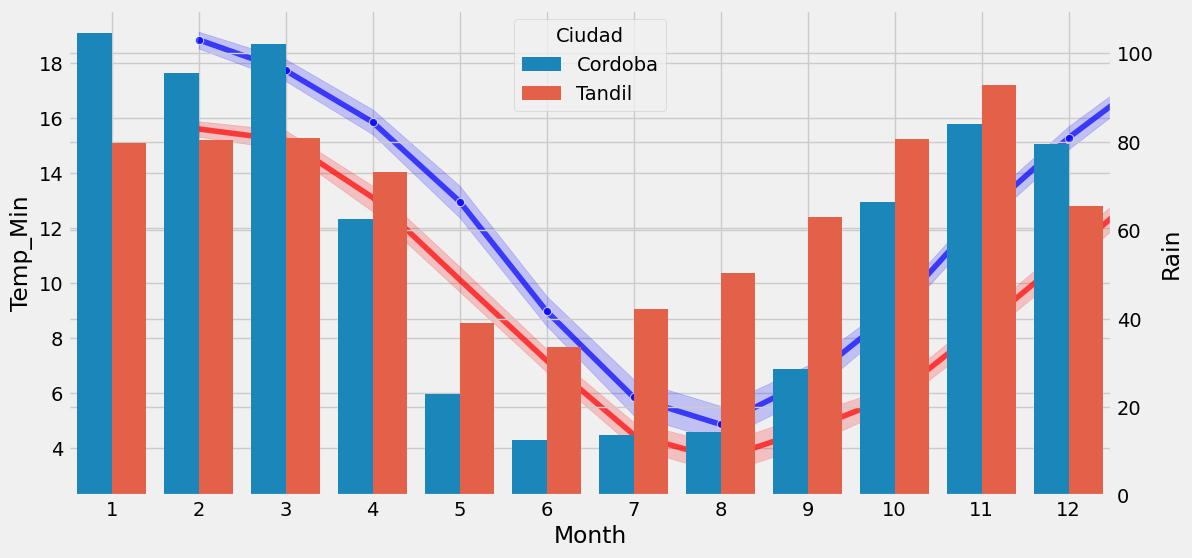

In [35]:
#El clima es igual todos los meses del año? Las dos ciudades tienen el mismo comportamiento? (mean de temp max y min, mean de lluvias mensuales)
#barras mean lluvias mensuales (primero tengo que sumar las de cada periodo)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = clima_groupby.loc[clima_groupby['Ciudad'] == 'Tandil'], x='Month', y='Temp_Min', ax=ax1,color='red', alpha=0.7)
sns.lineplot(data = clima_groupby.loc[clima_groupby['Ciudad'] == 'Cordoba'], x='Month', y='Temp_Min', marker='o',ax=ax1, color='blue', alpha=0.7)

ax2 = ax1.twinx()
sns.barplot(data = clima_groupby, x='Month', y='Rain', ax=ax2, hue='Ciudad', ci=None)


Las ciudades muestran a grandes razgos un comportamiento similar, durante los meses de invierno y menor temperatura se presenta la epoca de menores lluvias. 

La ciudad de Cordoba presenta mayor cantidad de lluvias (mm) de diciembre a marzo, mientras que la temperatura es siempre mayor en relación a Tandil. 

In [36]:
mean_rain_cordoba=df_clima_v.loc[df_clima_v['Ciudad']=='Cordoba'].groupby(['Year']).agg({ 'Rain':'sum'}).mean()
mean_rain_tandil=df_clima_v.loc[df_clima_v['Ciudad']=='Tandil'].groupby(['Year']).agg({ 'Rain':'sum'}).mean()
print(mean_rain_cordoba,mean_rain_tandil)

Rain    686.813043
dtype: float64 Rain    781.030435
dtype: float64


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


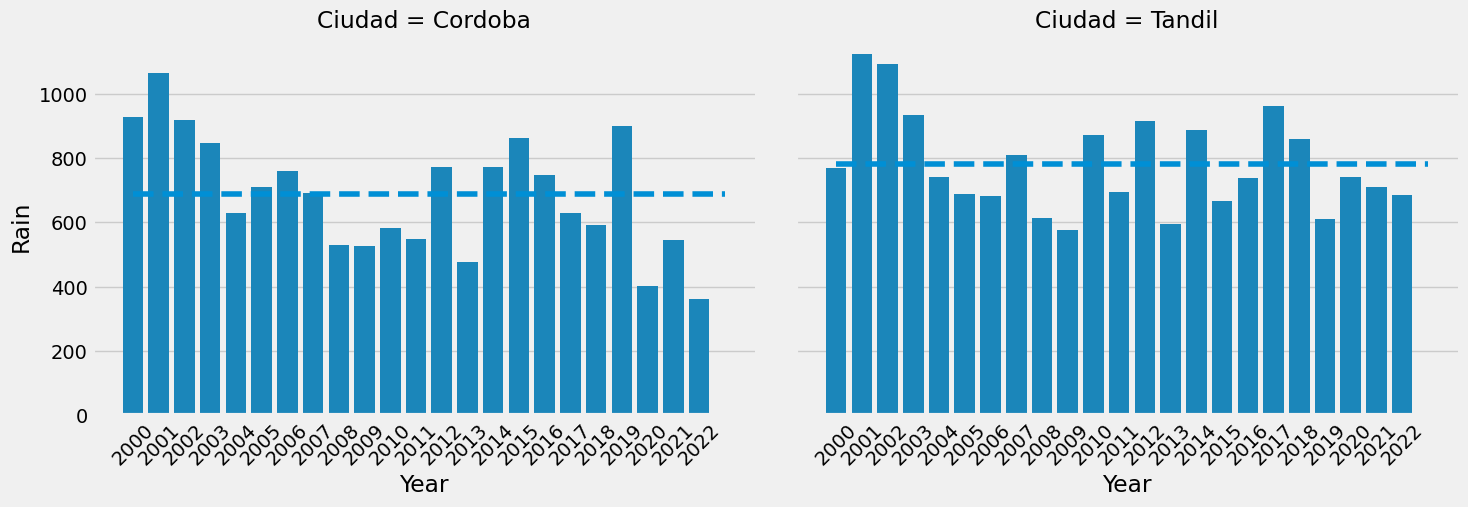

In [37]:
#existen años de lluvias atipicas?
g=sns.FacetGrid(clima_groupby, col='Ciudad', height=5, aspect=1.5)
g.map(sns.barplot, 'Year', 'Rain', estimator=sum, ci=None)
ax1, ax2 = g.axes[0]

ax1.hlines(y=mean_rain_cordoba,xmin=0, xmax=23, linestyles='dashed', label='Mean')
ax2.hlines(y=mean_rain_tandil,xmin=0, xmax=23, linestyles='dashed', label='Mean')
g.set_xticklabels(rotation=45)

plt.show()

Si, en ambas ciudades podemos apreciar que los años 2001 a 2003 fueron de lluvias mayores al promedio, mientras que 2008, 2009 menores al mismo. 

La ciudad de Cordoba presenta mayor cantidad de años atipicos en el nivel de precipitaciones, siendo estos aquellos considerablemente más diferenciados del valor promedio. 

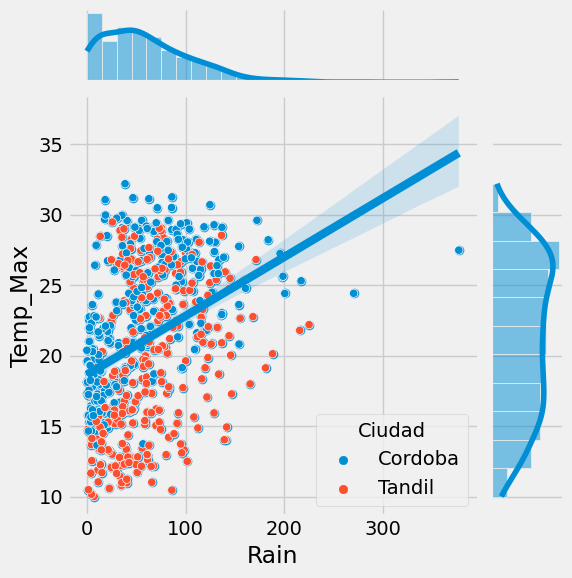

In [38]:
#Las temperaturas guardan relacion con las lluvias?
g= sns.jointplot(x='Rain', y='Temp_Max', data=clima_groupby,  kind='reg', scatter= True)
sns.scatterplot(x='Rain', y='Temp_Max', data=clima_groupby, hue='Ciudad', ax=g.ax_joint)

plt.show()

Observamos que hay un relación positiva entre las lluvias mensuales y la temperatura promedio de dicho mes. Es decir, los meses de mayores precipitaciones son además los más calurosos.

# Le sumamos los datos del tiempo a nuestro dataframe de Commodities

In [39]:
#uno los df de forma horizontal, hacemos un join a traves del campo de fecha
df_clima=pd.merge(df_tandil, df_cordoba, on='Date', how='inner', suffixes= ('_Tandil', '_Cordoba'))
df_clima

,Date,Temp_Max_Tandil,Temp_Min_Tandil,Rain_Tandil,Ciudad_Tandil,Temp_Max_Cordoba,Temp_Min_Cordoba,Rain_Cordoba,Ciudad_Cordoba
0,2000-01-01,30.8,17.1,0.0,Tandil,28.7,18.2,0.0,Cordoba
1,2000-01-02,31.5,18.6,0.0,Tandil,28.8,17.9,0.0,Cordoba
2,2000-01-03,30.8,14.4,0.0,Tandil,28.5,19.5,0.0,Cordoba
3,2000-01-04,31.2,14.9,0.0,Tandil,28.4,17.1,2.1,Cordoba
4,2000-01-05,31.7,18.3,3.2,Tandil,28.8,15.9,0.0,Cordoba
...,...,...,...,...,...,...,...,...,...
8396,2022-12-27,29.9,14.8,0.1,Tandil,29.5,15.8,0.6,Cordoba
8397,2022-12-28,23.7,14.8,0.6,Tandil,28.3,16.9,0.5,Cordoba
8398,2022-12-29,27.8,10.9,0.0,Tandil,31.2,15.4,0.0,Cordoba
8399,2022-12-30,34.0,18.2,0.0,Tandil,34.2,19.1,0.0,Cordoba


In [40]:
df_commodity.head()
df_commodity['DayOfWeek']=df_commodity['Date'].dt.strftime('%A')
df_commodity['DayOfMonth']=pd.DatetimeIndex(df_commodity['Date']).day

df_commodity=df_commodity.set_index(['Date'])

In [41]:
#agregamos al df con el que veniamos trabajando los datos de lluvia y temperatura de dos ciudades de Argentina
#utilizamos left join ya que nuestro objetivo es poder predecir precios, los cuales se encuentran en el primer df. Si hubiera perdida de datos, seran datos del segundo df

df_merged=pd.merge(df_commodity, df_clima, on = 'Date' , how='left')
df_merged['Periodo']=df_merged['Date'].dt.strftime('20%y %m')
df_merged

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,DayOfMonth,Temp_Max_Tandil,Temp_Min_Tandil,Rain_Tandil,Ciudad_Tandil,Temp_Max_Cordoba,Temp_Min_Cordoba,Rain_Cordoba,Ciudad_Cordoba,Periodo
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,3,30.8,14.4,0.0,Tandil,28.5,19.5,0.0,Cordoba,2000 01
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,4,31.2,14.9,0.0,Tandil,28.4,17.1,2.1,Cordoba,2000 01
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,5,31.7,18.3,3.2,Tandil,28.8,15.9,0.0,Cordoba,2000 01
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,6,28.3,13.7,0.0,Tandil,31.2,17.5,0.0,Cordoba,2000 01
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,7,28.9,17.3,2.0,Tandil,29.6,19.1,0.6,Cordoba,2000 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,2022-11-14,5.933,1776.9,85.87,93.14,1441.75,657.25,3.8335,22.113,991.75,...,14,19.4,13.1,2.4,Tandil,28.0,11.5,0.0,Cordoba,2022 11
5904,2022-11-15,6.034,1776.8,86.92,93.86,1457.25,666.75,3.8200,21.518,990.25,...,15,26.5,11.6,0.0,Tandil,32.4,14.4,0.0,Cordoba,2022 11
5905,2022-11-16,6.200,1775.8,85.59,92.86,1429.25,665.25,3.7735,21.524,991.75,...,16,30.4,14.5,0.1,Tandil,34.2,18.0,0.0,Cordoba,2022 11
5906,2022-11-17,6.369,1763.0,81.64,89.78,1417.00,667.50,3.6880,20.975,956.00,...,17,28.0,17.2,5.6,Tandil,33.8,18.9,0.0,Cordoba,2022 11


<Axes: >

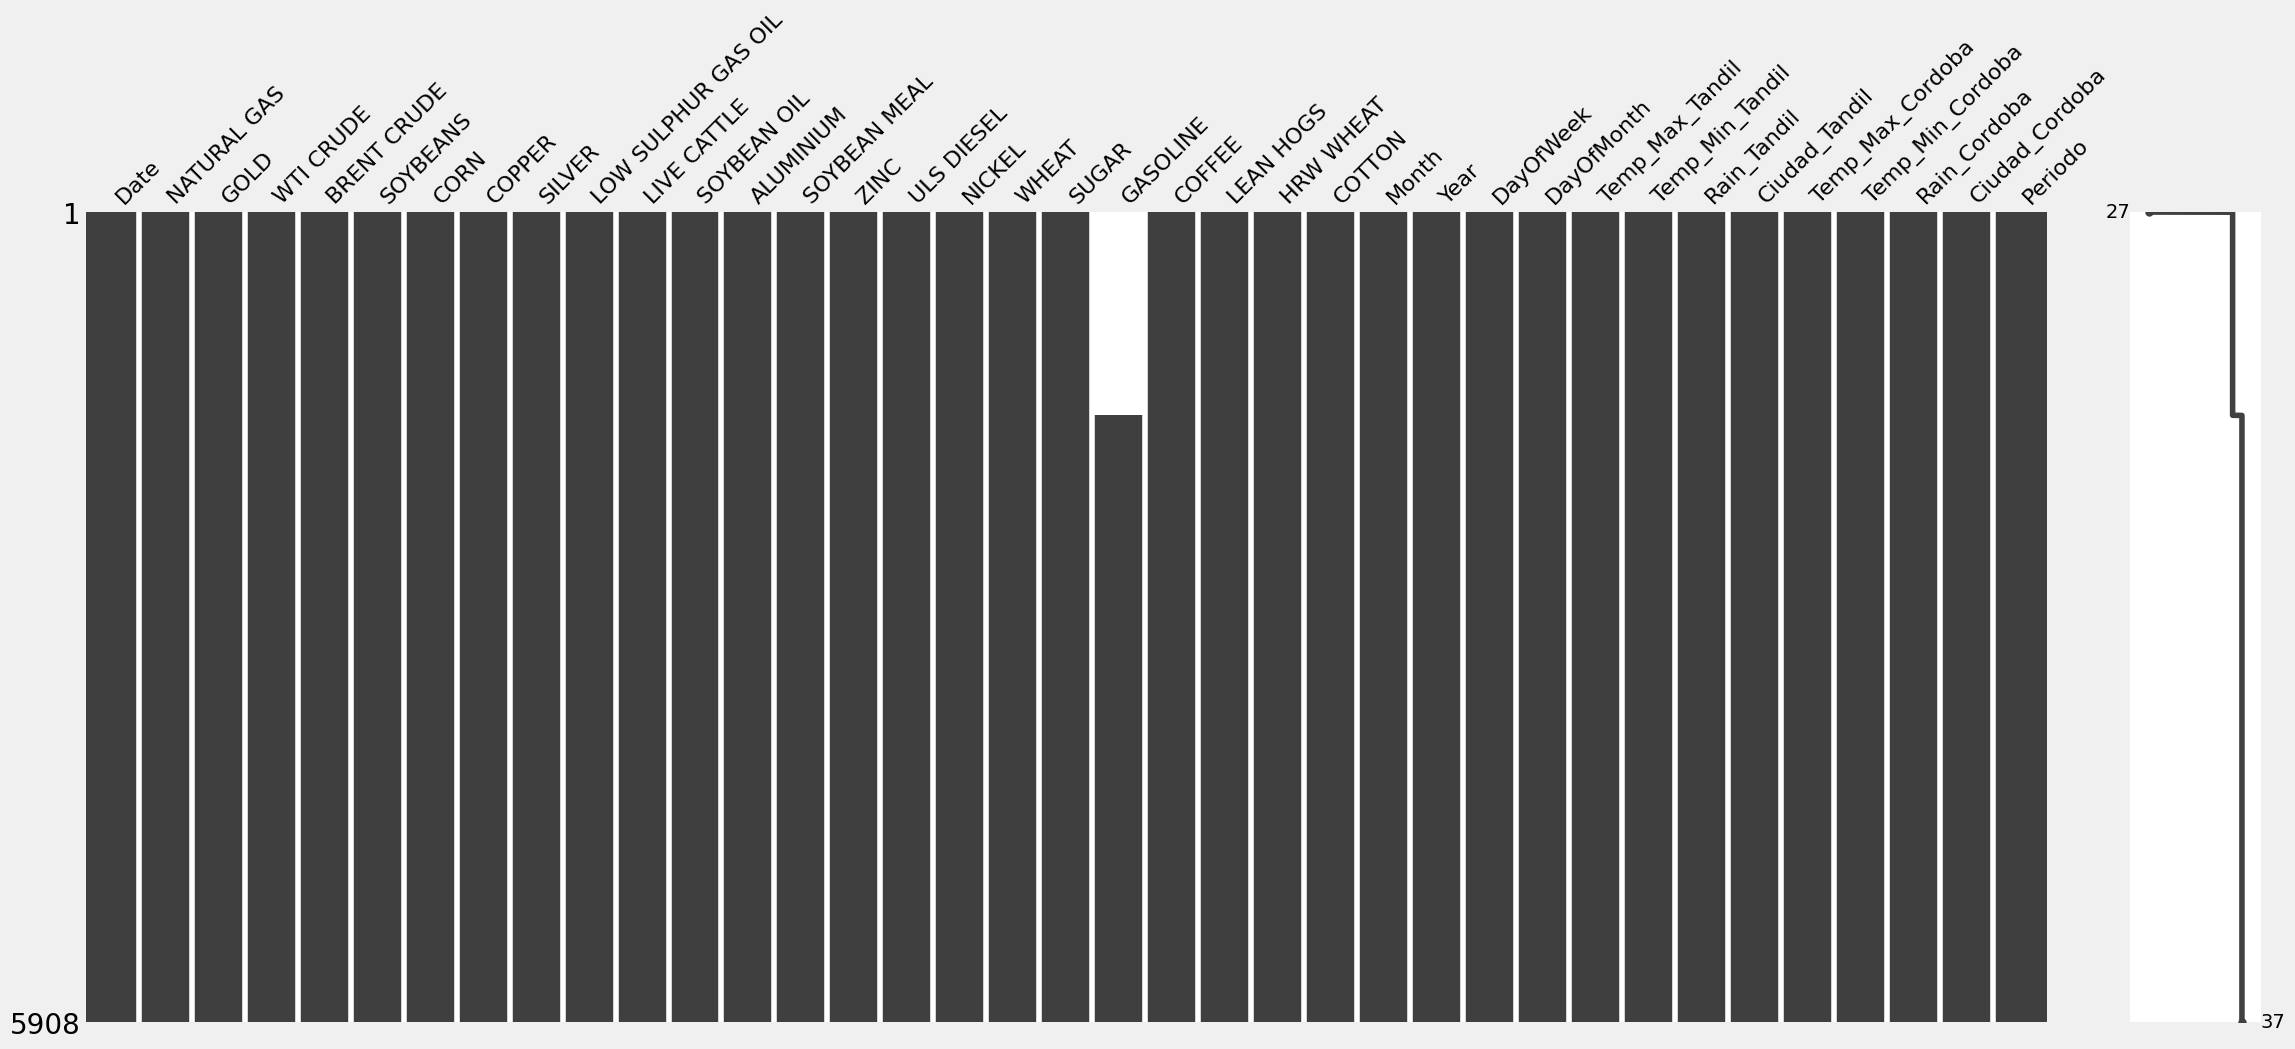

In [42]:
import missingno as msno

msno.matrix(df_merged) 

In [43]:
df_merged.columns


Index(['Date', 'NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS',
       'CORN', 'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL', 'LIVE CATTLE',
       'SOYBEAN OIL', 'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL',
       'NICKEL', 'WHEAT', 'SUGAR', 'GASOLINE', 'COFFEE', 'LEAN HOGS',
       'HRW WHEAT', 'COTTON', 'Month', 'Year', 'DayOfWeek', 'DayOfMonth',
       'Temp_Max_Tandil', 'Temp_Min_Tandil', 'Rain_Tandil', 'Ciudad_Tandil',
       'Temp_Max_Cordoba', 'Temp_Min_Cordoba', 'Rain_Cordoba',
       'Ciudad_Cordoba', 'Periodo'],
      dtype='object')

In [44]:
df_groupby=df_merged.groupby('Year').agg({
    'NATURAL GAS':'mean',
    'GOLD':'mean',
    'WTI CRUDE':'mean',
    'BRENT CRUDE':'mean',
    'SOYBEANS':'mean',
    'CORN':'mean',
    'COPPER':'mean',
    'SILVER':'mean',
    'LOW SULPHUR GAS OIL':'mean',
    'LIVE CATTLE':'mean',
    'SOYBEAN OIL':'mean', 
    'ALUMINIUM':'mean',
    'SOYBEAN MEAL':'mean',
    'ZINC':'mean', 
    'ULS DIESEL':'mean',
    'NICKEL':'mean',
    'WHEAT':'mean',
    'SUGAR':'mean', 
    'GASOLINE':'mean', 
    'COFFEE':'mean',
    'LEAN HOGS':'mean',
    'HRW WHEAT':'mean', 
    'COTTON':'mean', 
    'Temp_Max_Tandil':'max',
    'Temp_Min_Tandil': 'min',
    'Temp_Max_Cordoba':'max',
    'Temp_Min_Cordoba': 'min',
    'Rain_Tandil':'sum', 
    'Rain_Cordoba':'sum'})
df_groupby

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,Temp_Max_Tandil,Temp_Min_Tandil,Temp_Max_Cordoba,Temp_Min_Cordoba,Rain_Tandil,Rain_Cordoba
Year,,,,,,,,,,,,,,,,,,,,,
2000,4.317291,279.424419,30.301667,28.467403,498.094595,209.475869,0.840851,4.979039,251.911822,70.211197,...,89.562741,61.116313,294.023166,60.119614,32.7,-1.3,34.4,-3.6,424.3,590.9
2001,4.029074,271.300778,25.936187,24.869611,459.582685,208.739300,0.726411,4.364654,215.203307,72.857588,...,54.722568,61.279183,304.564202,42.879883,35.2,-1.5,34.5,-2.6,729.8,626.9
2002,3.362050,310.559690,26.120426,25.060543,514.687984,227.457364,0.718184,4.599345,207.691860,68.573934,...,53.397093,48.097093,353.070736,41.486783,31.4,-3.0,35.0,-0.4,604.3,584.2
2003,5.485942,364.175486,31.031089,28.453658,634.935798,233.555447,0.811918,4.895062,249.967899,82.125973,...,61.886576,55.765175,347.389105,59.749533,35.8,-1.0,38.5,-0.7,639.1,570.6
2004,6.183355,410.066795,41.449112,38.035792,751.179537,252.155405,1.288027,6.686625,347.466216,83.750193,...,76.247490,70.079537,366.974903,55.462008,33.1,-0.4,36.4,0.1,549.1,506.9
2005,9.015790,445.603891,56.705564,55.209572,607.964008,208.705253,1.649325,7.330615,507.432879,87.289300,...,107.168677,68.496693,346.233463,50.327588,32.0,-2.7,34.6,0.3,545.3,482.6
2006,6.979461,604.841797,66.229844,66.097891,591.703125,260.186523,3.076705,11.563949,580.373047,86.208691,...,107.775977,64.193750,468.014648,52.153633,32.3,-1.5,38.4,0.3,485.2,548.1
2007,7.110422,697.423256,72.310775,72.658992,862.716085,373.267442,3.226731,13.400853,637.839147,93.876744,...,117.357752,65.561725,644.376938,57.189302,33.9,-3.6,35.3,-7.9,685.2,539.4
2008,8.912313,871.731660,99.886448,98.523166,1233.722973,527.625483,3.130635,14.979923,920.745174,93.650097,...,132.094402,66.134266,836.716216,63.606718,34.3,-1.7,35.7,-1.2,440.2,287.5


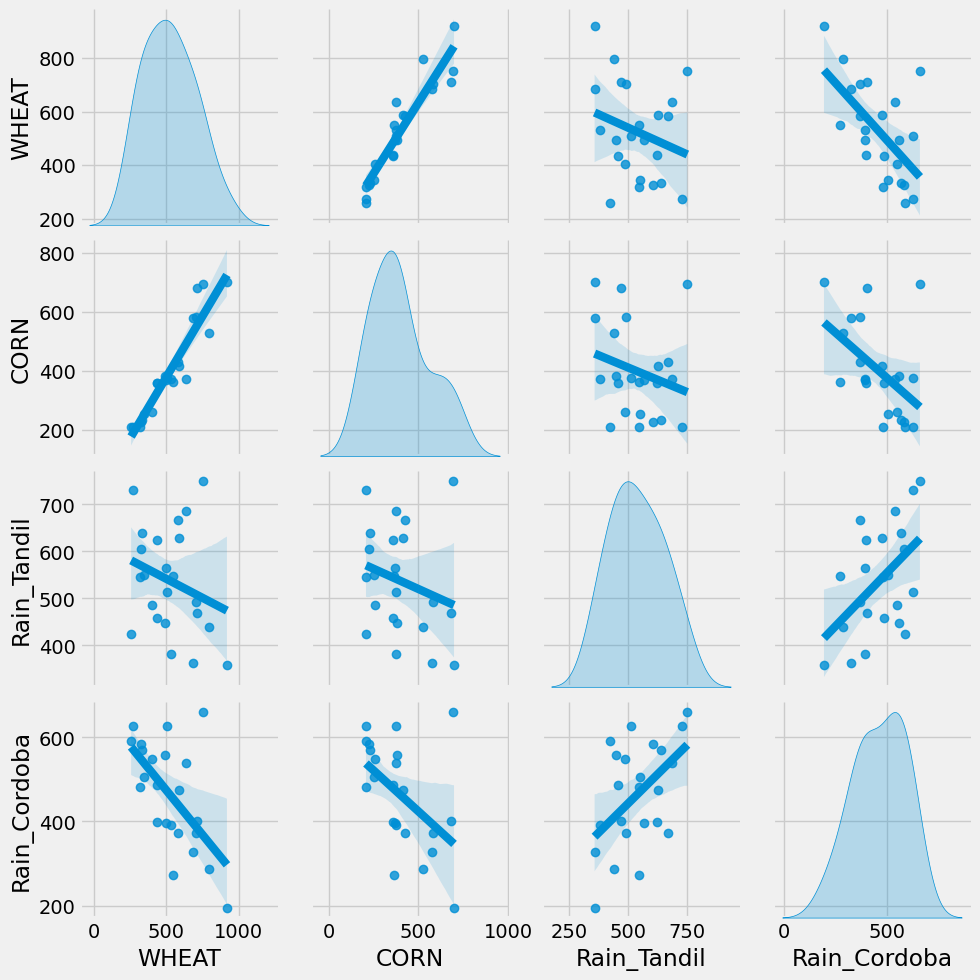

In [45]:
#Habra relacion entre las lluvias y los precios de los commodities? 
#Si la hubiera, no tendria sentido que fuera instantanea, debería de haber una demora entre las lluvias y el aumento/disminución de precios.

sns.pairplot(df_groupby, vars=['WHEAT','CORN','Rain_Tandil','Rain_Cordoba'], kind='reg' , diag_kind='kde')

Nuestro conocimiento respecto de la tematica nos lleva a pensar que si los precios de los commodities, en este caso cereales ampliamente sembrados en Argentina, tuvieran relacion con las precipitaciones , la misma no podria observarse de forma *instantanea*. Esto es debido a la demora en el crecimiento vegetativo de los cultivos y su fecha habitual de comercialización. Una buena cosecha suele se el fruto de lluvias abundantes ocurridas en el año previo.

Tanto las lluvias producidas en Tandil como en Córdoba muestran relaciones *inversas* con los precios del trigo y maiz. 
Esto no significa que nuestra hipotesis este completamente refutada, sino que la forma en la que estan organizados nuestros datos es funcional para responder esta pregunta. 

# Modelos

In [46]:
import statsmodels.stats.api as sms
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [47]:
#Date-Time Decomposition
df_modelo2 = df_groupby.dropna()
df_modelo1 = df_merged

df_modelo1['DayOfWeek']=df_modelo1['Date'].dt.strftime('%A')
df_modelo1['DayOfMonth']=pd.DatetimeIndex(df_modelo1['Date']).day
df_modelo1['DayOfYear']=pd.DatetimeIndex(df_modelo1['Date']).day_of_year

df_modelo1=df_modelo1.set_index(['Date'])
df_modelo1.head(5)

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,Temp_Max_Tandil,Temp_Min_Tandil,Rain_Tandil,Ciudad_Tandil,Temp_Max_Cordoba,Temp_Min_Cordoba,Rain_Cordoba,Ciudad_Cordoba,Periodo,DayOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,30.8,14.4,0.0,Tandil,28.5,19.5,0.0,Cordoba,2000 01,3
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,31.2,14.9,0.0,Tandil,28.4,17.1,2.1,Cordoba,2000 01,4
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,31.7,18.3,3.2,Tandil,28.8,15.9,0.0,Cordoba,2000 01,5
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,28.3,13.7,0.0,Tandil,31.2,17.5,0.0,Cordoba,2000 01,6
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,28.9,17.3,2.0,Tandil,29.6,19.1,0.6,Cordoba,2000 01,7


In [48]:
#Como quiero hacer una regresion que tambien considere variables categoricas, separo el df, hago one-hot encoding y luego lo vuelvo a unir

commodity_categoricas=pd.get_dummies(data=df_modelo1['DayOfWeek'], drop_first=False) #si ponia drop_first=True me eliminaba la columna del viernes

#Uno los dos df y elimino la columna redundante de DayOfWeek
df_modelo1=pd.concat([df_modelo1,commodity_categoricas],axis=1)

df_modelo1=df_modelo1.drop(['DayOfWeek','Ciudad_Tandil', 'Ciudad_Cordoba', 'Periodo'],axis=1)
df_modelo1.dropna(inplace=True)
df_modelo1.head(5)

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,Rain_Tandil,Temp_Max_Cordoba,Temp_Min_Cordoba,Rain_Cordoba,DayOfYear,Friday,Monday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-03,14.017,466.1,65.47,62.80,581.00,208.75,1.7590,7.455,627.75,89.225,...,14.8,20.8,12.8,1.7,276,0,1,0,0,0
2005-10-04,14.224,466.1,63.90,61.22,562.50,205.75,1.7660,7.425,607.75,90.950,...,0.0,13.0,8.4,1.4,277,0,0,0,1,0
2005-10-05,14.183,466.1,62.79,60.12,563.50,204.75,1.7865,7.478,614.50,90.300,...,0.0,18.9,3.9,0.0,278,0,0,0,0,1
2005-10-06,13.375,471.9,61.36,58.37,564.25,204.25,1.7830,7.595,592.75,89.725,...,0.0,19.5,7.6,0.0,279,0,0,1,0,0
2005-10-07,13.226,474.7,61.84,59.21,564.25,202.50,1.8085,7.770,595.00,90.250,...,0.0,23.7,7.4,1.2,280,1,0,0,0,0


In [49]:
#sin variables categoricas
df_modelo3=df_modelo1.drop(labels=['Month',	'Year',	'DayOfMonth',	'DayOfYear',	'Friday',	'Monday',	'Thursday',	'Tuesday',	'Wednesday'],axis=1)
df_modelo3.head(5)
#modelo3 tiene menos variables

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,Temp_Max_Tandil,Temp_Min_Tandil,Rain_Tandil,Temp_Max_Cordoba,Temp_Min_Cordoba,Rain_Cordoba
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-03,14.017,466.1,65.47,62.80,581.00,208.75,1.7590,7.455,627.75,89.225,...,92.85,68.225,381.75,52.55,9.3,7.2,14.8,20.8,12.8,1.7
2005-10-04,14.224,466.1,63.90,61.22,562.50,205.75,1.7660,7.425,607.75,90.950,...,92.70,68.025,379.00,51.55,11.1,5.4,0.0,13.0,8.4,1.4
2005-10-05,14.183,466.1,62.79,60.12,563.50,204.75,1.7865,7.478,614.50,90.300,...,93.70,68.200,378.00,52.45,12.3,4.0,0.0,18.9,3.9,0.0
2005-10-06,13.375,471.9,61.36,58.37,564.25,204.25,1.7830,7.595,592.75,89.725,...,93.50,67.675,381.75,52.75,15.8,0.9,0.0,19.5,7.6,0.0
2005-10-07,13.226,474.7,61.84,59.21,564.25,202.50,1.8085,7.770,595.00,90.250,...,94.85,68.550,376.75,52.20,19.1,4.4,0.0,23.7,7.4,1.2


In [53]:
# X y y para crear mi regresion
X,y= df_modelo3.drop('WHEAT',axis=1),df_modelo1['WHEAT']

# Recordar escalar los datos
std=MinMaxScaler()
X_std=std.fit_transform(X)

#separo el x e y en test y train
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1812)

In [56]:
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  WHEAT   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     5348.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:56:01   Log-Likelihood:                -14180.
No. Observations:                3097   AIC:                         2.842e+04
Df Residuals:                    3068   BIC:                         2.859e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.3007      9.436     32.991      0.0

Un P-Valor bajo nos permite rechazar la hipotesis nula(cuando la variable independiente no tiene efecto en la variable dependiente).

Las variables con P-Valor alto no estan influyendo en la varible dependiente.

In [57]:
x_test = sm.add_constant(X_test)
model.predict(x_test)


array([736.73594021, 504.37030558, 542.19452549, ..., 732.87038575,
       651.36338856, 791.15187289])

In [58]:
#modelo1 tiene mas variables
# X y y para crear mi regresion
X,y= df_modelo1.drop('WHEAT',axis=1),df_modelo1['WHEAT']

# Recordar escalar los datos
std=MinMaxScaler()
X_std=std.fit_transform(X)

#separo el x e y en test y train
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1812)

In [59]:
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  WHEAT   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     4413.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:06:33   Log-Likelihood:                -14086.
No. Observations:                3097   AIC:                         2.825e+04
Df Residuals:                    3060   BIC:                         2.847e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.3628      7.936     31.044      0.0

Al agregar variables se mejoran levemente las metricas, pero pasan de ser 3 a 4 las variables con P-valor alto